In [2]:
#Setup
import pandas as pd
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
cc_data = pd.read_csv("/Users/sarakleine-kracht/Desktop/Project_1_Group_3/cc_data.csv")
cc_data.head()

,Unnamed: 0,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,dob,merch_lat,merch_long
0,264582,2020-09-27 09:41:48,gas_transport,63.12,F,Orient,WA,48.8878,-118.2105,149,1978-06-21,48.633738,-118.039422
1,350571,2020-11-03 11:29:38,gas_transport,68.82,F,Enola,AR,35.2087,-92.2123,969,1954-01-05,36.179802,-92.650560
2,456043,2020-12-09 16:24:42,home,100.85,F,Orangeburg,NY,41.0442,-73.9609,5950,1971-07-02,41.535820,-73.171710
3,537676,2020-12-28 04:18:11,entertainment,7.84,F,Gadsden,AL,34.0480,-85.9246,67082,1963-02-09,33.307946,-86.376173
4,19760,2020-06-28 10:16:40,misc_pos,16.00,M,Minnesota Lake,MN,43.8295,-93.8282,1087,1963-07-14,44.091922,-93.247544


Fraudulent Transaction Category Analysis

In [4]:
base_category = pd.DataFrame(cc_data["category"].value_counts())
base_category_df = base_category.rename(index= {'gas_transport': 'Gas and Transport', 'home': 'Home', 'grocery_pos': 'Grocery (In Store)', 'shopping_pos': "Shopping (In Store)", 'kids_pets': 'Kids and Pets', 'entertainment': 'Entertainment', 'health_fitness': 'Health and Fitness', 'personal_care': 'Personal Care', 'food_dining': 'Food and Dining', 'shopping_net': 'Shopping (Online)', 'misc_pos': 'Misc (In Store)', 'misc_net': 'Misc (Online)', 'grocery_net': 'Grocery (Online)', 'travel': 'Travel'})
base_category_df

,count
category,
Gas and Transport,1065
Home,979
Grocery (In Store),934
Shopping (In Store),908
Kids and Pets,883
Entertainment,740
Health and Fitness,708
Personal Care,694
Food and Dining,683


The category with the highest number of fraudulent transactions is gas and transport with 1,065 transactions. The category with the lowest number of fraudulent transactions is Travel with 312 transactions.

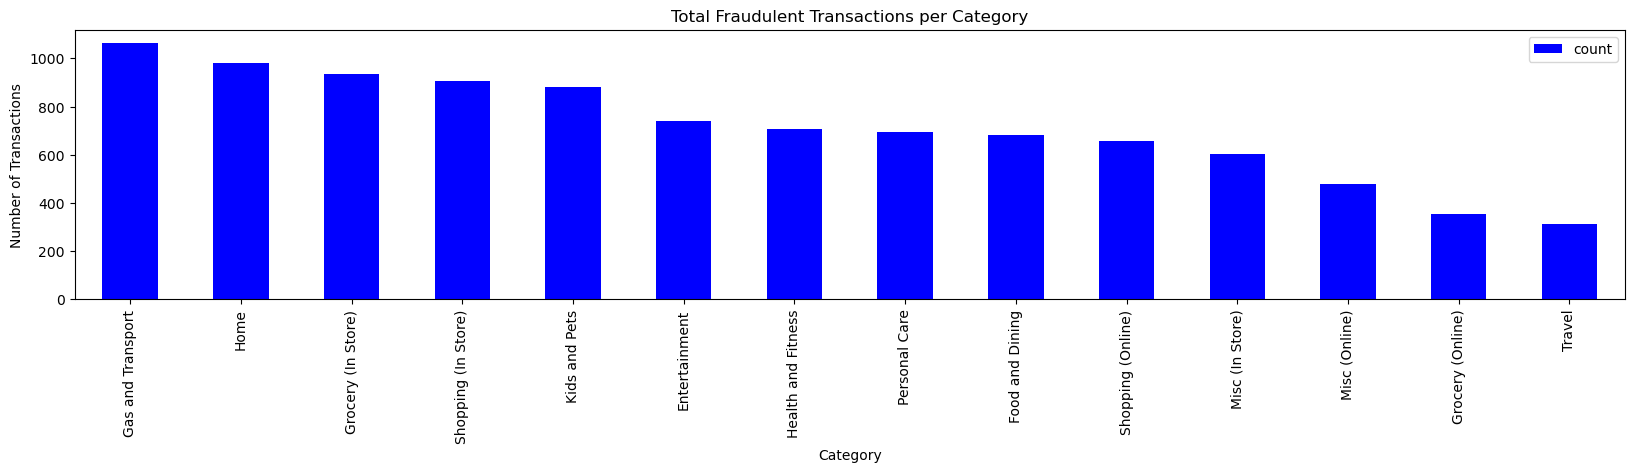

<Figure size 640x480 with 0 Axes>

In [5]:

category_bar = base_category_df.plot(kind="bar", color= 'b', figsize=(20,3.5))
plt.title("Total Fraudulent Transactions per Category")
plt.xlabel("Category")
plt.ylabel("Number of Transactions")
plt.show()
plt.tight_layout()

In [11]:
grouped_category_df = cc_data.groupby(["category"])
grouped_category_df.head(20)

,Unnamed: 0,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,dob,merch_lat,merch_long
0,264582,2020-09-27 09:41:48,gas_transport,63.12,F,Orient,WA,48.8878,-118.2105,149,1978-06-21,48.633738,-118.039422
1,350571,2020-11-03 11:29:38,gas_transport,68.82,F,Enola,AR,35.2087,-92.2123,969,1954-01-05,36.179802,-92.650560
2,456043,2020-12-09 16:24:42,home,100.85,F,Orangeburg,NY,41.0442,-73.9609,5950,1971-07-02,41.535820,-73.171710
3,537676,2020-12-28 04:18:11,entertainment,7.84,F,Gadsden,AL,34.0480,-85.9246,67082,1963-02-09,33.307946,-86.376173
4,19760,2020-06-28 10:16:40,misc_pos,16.00,M,Minnesota Lake,MN,43.8295,-93.8282,1087,1963-07-14,44.091922,-93.247544
...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,344895,2020-11-01 14:13:18,travel,8.72,M,Des Moines,IA,41.6030,-93.6330,222785,1981-08-10,40.743736,-93.194836
715,482778,2020-12-15 13:53:24,travel,8.28,F,Red River,NM,36.6659,-105.4694,606,1988-09-06,36.323831,-106.290052
722,114647,2020-07-31 12:53:35,travel,7.85,M,Halma,MN,48.6669,-96.5969,140,1942-01-06,49.650562,-97.148968
724,355456,2020-11-05 21:16:02,travel,8.32,F,Barnstable,MA,41.6983,-70.3001,1850,1963-12-29,42.238340,-69.780960


In [10]:
category_amt = grouped_category_df['amt'].sum()
cleaned_category_amt = category_amt.rename(index= {'gas_transport': 'Gas and Transport', 'home': 'Home', 'grocery_pos': 'Grocery (In Store)', 'shopping_pos': "Shopping (In Store)", 'kids_pets': 'Kids and Pets', 'entertainment': 'Entertainment', 'health_fitness': 'Health and Fitness', 'personal_care': 'Personal Care', 'food_dining': 'Food and Dining', 'shopping_net': 'Shopping (Online)', 'misc_pos': 'Misc (In Store)', 'misc_net': 'Misc (Online)', 'grocery_net': 'Grocery (Online)', 'travel': 'Travel'})
cleaned_category_amt

category
Entertainment           47908.70
Food and Dining         33670.17
Gas and Transport       67659.56
Grocery (Online)        18965.07
Grocery (In Store)     107104.88
Health and Fitness      37485.43
Home                    53318.66
Kids and Pets           47635.75
Misc (Online)           34290.51
Misc (In Store)         38012.03
Personal Care           34048.85
Shopping (Online)       55940.08
Shopping (In Store)     93749.40
Travel                  29550.53
Name: amt, dtype: float64

The Grocery (In Store) category had the highest total loss in dollars with $107,104.88. The Grocery (Online) category had the lowest total loss in dollars with $18,965.07.

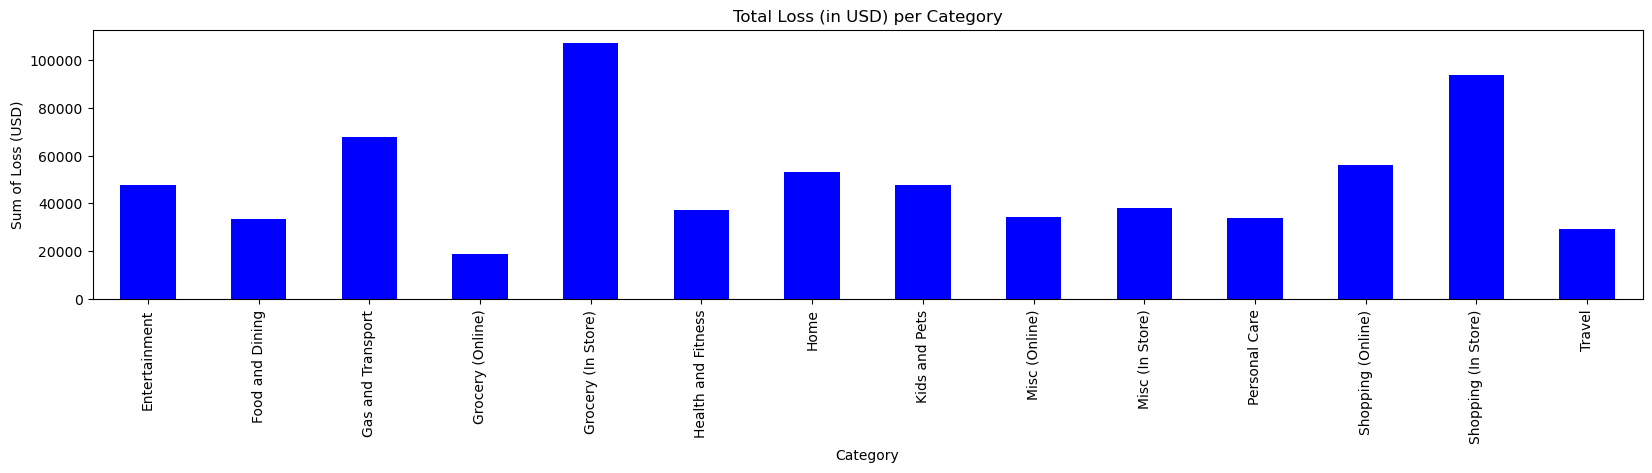

<Figure size 640x480 with 0 Axes>

In [8]:
category_totals_bar = cleaned_category_amt.plot(kind="bar", color= 'b', figsize=(20,3.5))
plt.title("Total Loss (in USD) per Category")
plt.xlabel("Category")
plt.ylabel("Sum of Loss (USD)")
plt.show()
plt.tight_layout()